# Plot model fits for simulation analysis 1

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from psifr import fr
from mindstorm import statplot
from cymr import cmr
from cfr import framework
from cfr import figures

res_dir = Path(os.environ['CFR_RESULTS'])
fit_dir = Path(os.environ['CFR_FITS'])
fig_dir = Path(os.environ['CFR_FIGURES']) / 'sim1'

data_file = res_dir / 'cfr_eeg_mixed.csv'
patterns_file = res_dir / 'cfr_patterns.hdf5'
os.makedirs(fig_dir, exist_ok=True)
figures.set_style()

## Read observed and simulated data

In [2]:
patterns = cmr.load_patterns(patterns_file)
rsm = patterns['similarity']['use']

In [3]:
components = [
    'loc', 'cat', 'use', 'loc-cat', 'loc-use', 'cat-use', 'loc-cat-use'
]
models = [f'cmrs_fcf-{comp}' for comp in components]
model_names = ['I', 'C', 'D', 'IC', 'ID', 'CD', 'ICD']
data = framework.read_model_sims(data_file, fit_dir, models, model_names)

In [4]:
data.head()

subject  list                   item  input  output  study  \
source trial                                                               
I      0            1     2              SEAN PENN    1.0     NaN   True   
       1            1     2         AUDREY HEPBURN    2.0     8.0   True   
       2            1     2  ST PATRICKS CATHEDRAL    3.0    12.0   True   
       3            1     2          LES INVALIDES    4.0     9.0   True   
       4            1     2   GREAT ZIMBABWE RUINS    5.0     NaN   True   

              recall  repeat  intrusion  session  ... list_category  \
source trial                                      ...                 
I      0       False       0      False      1.0  ...         mixed   
       1        True       0      False      1.0  ...         mixed   
       2        True       0      False      1.0  ...         mixed   
       3        True       0      False      1.0  ...         mixed   
       4       False       0      False      1.0  ...         mixed   

             item_index  category block  n_block  block_pos  block_len  curr  \
source trial                                                                   
I      0          228.0       cel   NaN      NaN        NaN        NaN   NaN   
       1           19.0       cel   NaN      NaN        NaN        NaN   NaN   
       2          463.0       loc   NaN      NaN        NaN        NaN   NaN   
       3          364.0       loc   NaN      NaN        NaN        NaN   NaN   
       4          340.0       loc   NaN      NaN        NaN        NaN   NaN   

             prev base  
source trial            
I      0      NaN  NaN  
       1      NaN  NaN  
       2      NaN  NaN  
       3      NaN  NaN  
       4      NaN  NaN  

[5 rows x 21 columns]

## Set plotting parameters

In [5]:
curve = sns.color_palette(
    'ch:rot=-.5, light=.6, dark=.3, gamma=1', n_colors=len(models)
)
curve.insert(len(models), (.3, .3, .3))
curve

[(0.44163916703794076, 0.6914342033666265, 0.5414714890673176),
 (0.37680333890180306, 0.6421749281286224, 0.5190472356270401),
 (0.3237814498768263, 0.5927867044161492, 0.5007454824917508),
 (0.27424883716016524, 0.5352555384607786, 0.4809527643729599),
 (0.2328219480554011, 0.4740934551530011, 0.4585285109326825),
 (0.19871588360752257, 0.4101766194959508, 0.43091390277159347),
 (0.17051215858853222, 0.344636926092434, 0.3959064384004337),
 (0.3, 0.3, 0.3)]

In [6]:
dark = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.6', n_colors=len(models)
)
dark.insert(len(models), (.6, .6, .6))
dark

[(0.725301473503126, 0.8645990769601404, 0.7363315007817791),
 (0.6482301081514271, 0.8304114686677412, 0.7026336329579609),
 (0.5726480212561199, 0.7903330615780247, 0.6781127074715647),
 (0.49769124779560403, 0.7396109923554344, 0.6592940288312491),
 (0.434142969265212, 0.6825746803726097, 0.6442133332843847),
 (0.3788481069708822, 0.6159013359528693, 0.6266339293213777),
 (0.33145894574681245, 0.5393097642399239, 0.6005096167923277),
 (0.6, 0.6, 0.6)]

In [7]:
light = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.2', n_colors=len(models)
)
light.insert(len(models), (.85, .85, .85))
light

[(0.8973525746116884, 0.9546730560357413, 0.901891392639006),
 (0.8637400637238504, 0.9432473293594108, 0.8874827533494256),
 (0.8280152843984974, 0.9293987580038842, 0.8771338467738101),
 (0.7891039444527563, 0.9108297736038378, 0.8704169954006072),
 (0.7524272591968628, 0.8882868851933822, 0.8673082498778775),
 (0.7166514659590271, 0.8594380668180563, 0.8659027352474745),
 (0.6820851323976215, 0.8225675908928259, 0.8639314200489312),
 (0.85, 0.85, 0.85)]

In [8]:
figsize = (5, 2.5)
bar_kws = {'capsize': 0.6}
point_kws = {'size': 5}

## Clustering for all models

In [9]:
lag_rank_within = data.groupby('source').apply(
    fr.lag_rank, test_key='category', test=lambda x, y: x == y
)

LINO NOT subset; don't know how to subset; dropped


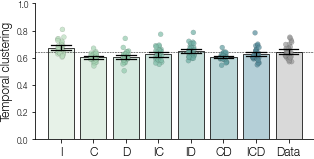

In [10]:
fig, ax = plt.subplots(figsize=figsize)
statplot.plot_swarm_bar(
    lag_rank_within,
    x='source',
    y='rank',
    dark=dark,
    light=light,
    point_kind='strip',
    bar_kws=bar_kws,
    point_kws=point_kws,
    ax=ax,
)
m = lag_rank_within.loc['Data', 'rank'].mean()
ax.axline([0, m], slope=0, linestyle='--', linewidth=.5, color='k')
ax.set(ylim=(0, 1), ylabel='Temporal clustering');
fig.savefig(fig_dir / 'comp_lag_rank.pdf')

In [11]:
cat_crp = data.groupby('source').apply(
    fr.category_crp, category_key='category'
)

LINO NOT subset; don't know how to subset; dropped


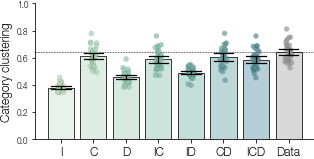

In [12]:
fig, ax = plt.subplots(figsize=figsize)
statplot.plot_swarm_bar(
    cat_crp,
    x='source',
    y='prob',
    dark=dark,
    light=light,
    point_kind='strip',
    bar_kws=bar_kws,
    point_kws=point_kws,
    ax=ax,
)
m = cat_crp.loc['Data', 'prob'].mean()
ax.axline([0, m], slope=0, linestyle='--', linewidth=.5, color='k')
ax.set(ylim=(0, 1), ylabel='Category clustering');
fig.savefig(fig_dir / 'comp_cat_crp.pdf')

In [13]:
use_rank = data.groupby('source').apply(
    fr.distance_rank, 'item_index', 1 - rsm, test_key='category',
    test=lambda x, y: x == y
)

LINO NOT subset; don't know how to subset; dropped


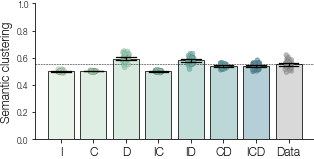

In [14]:
fig, ax = plt.subplots(figsize=figsize)
statplot.plot_swarm_bar(
    use_rank,
    x='source',
    y='rank',
    dark=dark,
    light=light,
    point_kind='strip',
    bar_kws=bar_kws,
    point_kws=point_kws,
    ax=ax,
)
m = use_rank.loc['Data', 'rank'].mean()
ax.axline([0, m], slope=0, linestyle='--', linewidth=.5, color='k')
ax.set(ylim=(0, 1), ylabel='Semantic clustering');
fig.savefig(fig_dir / 'comp_use_rank.pdf')

## Curves for all models

In [15]:
opt = {'col_wrap': 4, 'height': 2.2, 'palette': curve}

In [16]:
spc = data.groupby('source').apply(fr.spc)

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


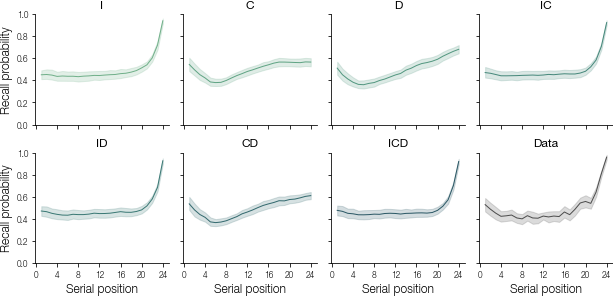

In [17]:
g = fr.plot_spc(spc, col='source', hue='source', **opt)
g.set_titles('{col_name}')
g.set(xticks=(0, 4, 8, 12, 16, 20, 24))
g.savefig(fig_dir / 'spc.pdf')

In [18]:
pfr = data.groupby('source').apply(lambda x: fr.pnr(x).query('output == 1'))

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


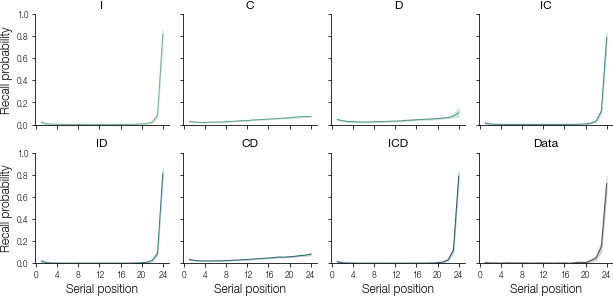

In [19]:
g = fr.plot_spc(pfr, col='source', hue='source', **opt)
g.set_titles('{col_name}')
g.set(xticks=(0, 4, 8, 12, 16, 20, 24))
g.savefig(fig_dir / 'pfr.pdf')

In [20]:
crp = data.groupby('source').apply(
    fr.lag_crp, test_key='category', test=lambda x, y: x == y
)

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


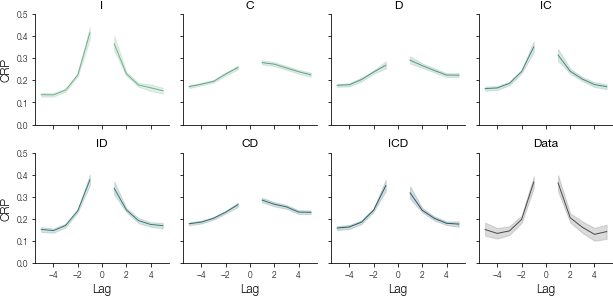

In [21]:
g = fr.plot_lag_crp(crp, col='source', hue='source', **opt)
g.set_titles('{col_name}')
g.set(ylim=(0, 0.5), xticks=[-4, -2, 0, 2, 4])
g.savefig(fig_dir / 'lag_crp.pdf')

In [22]:
edges = np.linspace(.05, .95, 10)
min_samples=5

dcrp_within = data.groupby('source').apply(
    fr.distance_crp, 'item_index', rsm, edges, 
    test_key='category', test=lambda x, y: x == y
)

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


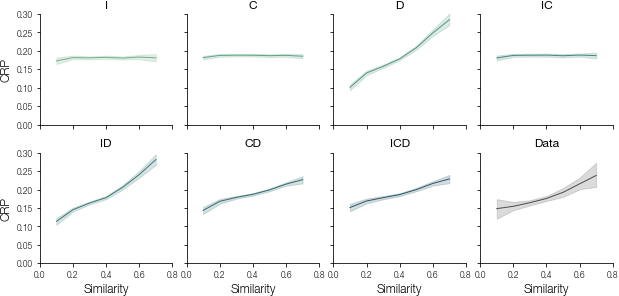

In [23]:
g = fr.plot_distance_crp(
    dcrp_within, min_samples=min_samples, col='source', hue='source', **opt
)
g.set_titles('{col_name}')
g.set(xlim=(0, .8), ylim=(0, .3), xlabel='Similarity')
g.savefig(fig_dir / 'use_crp_within.pdf')

In [24]:
dcrp_across = data.groupby('source').apply(
    fr.distance_crp, 'item_index', rsm, edges, 
    test_key='category', test=lambda x, y: x != y
)

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


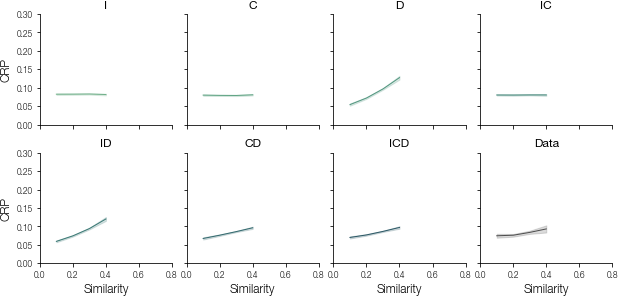

In [25]:
g = fr.plot_distance_crp(
    dcrp_across, min_samples=min_samples, col='source', hue='source', **opt
)
g.set_titles('{col_name}')
g.set(xlim=(0, .8), ylim=(0, .3), xlabel='Similarity')
g.savefig(fig_dir / 'use_crp_across.pdf')

## Individual differences

LINO NOT subset; don't know how to subset; dropped


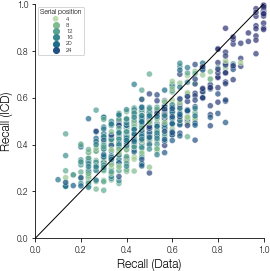

In [26]:
comp = spc.unstack(level=0).droplevel(axis=1, level=0).reset_index()
comp['Serial position'] = comp['input']
g = sns.relplot(
    data=comp, 
    kind='scatter',
    x='Data',
    y='ICD',
    hue='Serial position',
    palette='crest',
    clip_on=False,
    alpha=0.7,
    aspect=1,
    height=4,
)
g.ax.plot([0, 1], [0, 1], '-k');
lt = [t.get_text() for t in g.legend.texts]
g.legend.remove()
g.ax.legend(
    g.ax.collections, 
    lt, 
    fontsize='xx-small', 
    labelspacing=.2, 
    title='Serial position', 
    title_fontsize='x-small',
)
g.set_xlabels('Recall (Data)')
g.set_ylabels('Recall (ICD)')
g.set(xlim=(0, 1), ylim=(0, 1))
g.savefig(fig_dir / 'spc_indiv.pdf')

LINO NOT subset; don't know how to subset; dropped


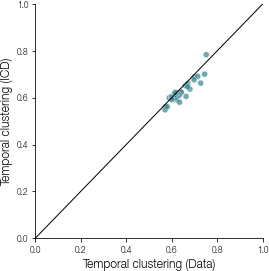

In [27]:
palette = sns.color_palette(n_colors=1)
comp = lag_rank_within.unstack(level=0).droplevel(axis=1, level=0).reset_index()
comp['temp'] = 1
g = sns.relplot(
    data=comp, 
    kind='scatter', 
    x='Data', 
    y='ICD', 
    hue='temp', 
    palette='crest', 
    alpha=0.7,
    aspect=1,
    height=4,
)
g.legend.remove()
g.axes[0, 0].plot([0, 1], [0, 1], '-k');
g.set_xlabels('Temporal clustering (Data)')
g.set_ylabels('Temporal clustering (ICD)')
g.set(xlim=(0, 1), ylim=(0, 1))
g.savefig(fig_dir / 'lag_rank_indiv.pdf')

LINO NOT subset; don't know how to subset; dropped


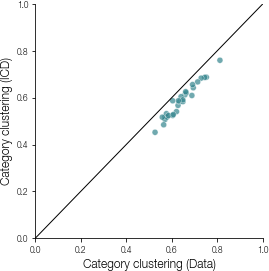

In [28]:
palette = sns.color_palette(n_colors=1)
comp = cat_crp.unstack(level=0)[['prob']].droplevel(axis=1, level=0).reset_index()
comp['temp'] = 1
g = sns.relplot(
    data=comp, 
    kind='scatter', 
    x='Data', 
    y='ICD', 
    hue='temp', 
    palette='crest',
    alpha=0.7,
    aspect=1,
    height=4,
)
g.legend.remove()
g.axes[0, 0].plot([0, 1], [0, 1], '-k');
g.set_xlabels('Category clustering (Data)')
g.set_ylabels('Category clustering (ICD)')
g.set(xlim=(0, 1), ylim=(0, 1))
g.savefig(fig_dir / 'cat_crp_indiv.pdf')

LINO NOT subset; don't know how to subset; dropped


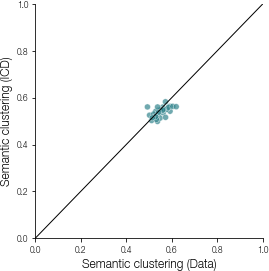

In [29]:
palette = sns.color_palette(n_colors=1)
comp = use_rank.unstack(level=0).droplevel(axis=1, level=0).reset_index()
comp['temp'] = 1
g = sns.relplot(
    data=comp, 
    kind='scatter', 
    x='Data', 
    y='ICD', 
    hue='temp', 
    palette='crest',
    alpha=0.7,
    aspect=1,
    height=4,
)
g.legend.remove()
g.axes[0, 0].plot([0, 1], [0, 1], '-k');
g.set_xlabels('Semantic clustering (Data)')
g.set_ylabels('Semantic clustering (ICD)')
g.set(xlim=(0, 1), ylim=(0, 1))
g.savefig(fig_dir / 'use_rank_indiv.pdf')

In [30]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.4.0

seaborn   : 0.11.2
cymr      : 0.11.2
numpy     : 1.21.4
cfr       : 0.1.0
matplotlib: 3.5.2
mindstorm : 0.8.1
psifr     : 0.8.0

